In [2]:
import pandas as pd 
import numpy as np 

In [4]:
df = pd.read_excel("input_data (3).xlsx")

In [7]:
df.shape

(8500, 4)

In [8]:
df.head(100)

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0
...,...,...,...,...
95,job SID_26cold failed in job_scheduler at: 10/...,received from: monitoring_tool@company.com_x00...,bpctwhsn kzqsbmtp,GRP_5
96,job SID_35cold failed in job_scheduler at: 10/...,received from: monitoring_tool@company.com_x00...,bpctwhsn kzqsbmtp,GRP_5
97,amssm00345: c:\ label:sys-amssm00345 94ef9088 ...,amssm00345: c:\ label:sys-amssm00345 94ef9088 ...,jyoqwxhz clhxsoqy,GRP_12
98,unable to view payslips from hr_tool e time,unable to view payslips from hr_tool e time,vzrbocfl wxtpoyez,GRP_0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


In [10]:
df.shape

(8500, 4)

In [11]:
df[df.duplicated(['Short description','Description'])]
df.drop_duplicates(['Short description','Description'],inplace=True)

In [12]:
df.columns

Index(['Short description', 'Description', 'Caller', 'Assignment group'], dtype='object')

In [13]:
df[df.isnull().any(axis=1)]

,Short description,Description,Caller,Assignment group
2604,NaN,_x000D_\n_x000D_\nreceived from: ohdrnswl.rezu...,ohdrnswl rezuibdt,GRP_34
3383,NaN,_x000D_\n-connected to the user system using t...,qftpazns fxpnytmk,GRP_0
3906,NaN,-user unable tologin to vpn._x000D_\n-connect...,awpcmsey ctdiuqwe,GRP_0
3924,NaN,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...,wvqgbdhm fwchqjor,GRP_0
4341,NaN,_x000D_\n_x000D_\nreceived from: eqmuniov.ehxk...,eqmuniov ehxkcbgj,GRP_0
4395,i am locked out of skype,NaN,viyglzfo ajtfzpkb,GRP_0


In [14]:
#group by categories 
df_grp = df.groupby(['Assignment group']).size().reset_index(name='counts')
df_grp

,Assignment group,counts
0,GRP_0,3426
1,GRP_1,31
2,GRP_10,140
3,GRP_11,30
4,GRP_12,255
...,...,...
69,GRP_71,2
70,GRP_72,1
71,GRP_73,1
72,GRP_8,644


In [15]:
df_grp.describe()

,counts
count,74.000000
mean,106.662162
std,403.193392
min,1.000000
25%,5.250000
50%,26.000000
75%,81.000000
max,3426.000000


In [16]:
df.head()
df.shape

(7893, 4)

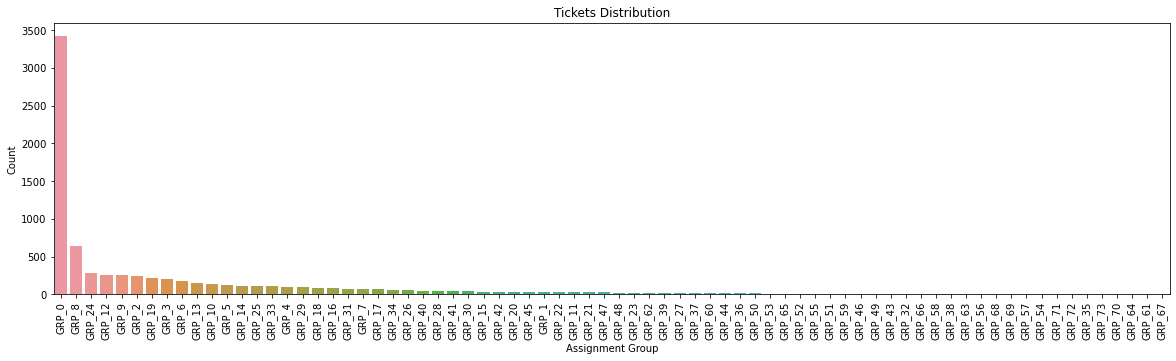

In [17]:
#Plot line graph and view counts of each tickets
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplots(figsize = (20,5))

sns.countplot(x='Assignment group', data=df,order = df['Assignment group'].value_counts().index)
plt.xlabel('Assignment Group') 
plt.ylabel('Count') 
plt.xticks(rotation=90)
plt.title('Tickets Distribution')

plt.show()

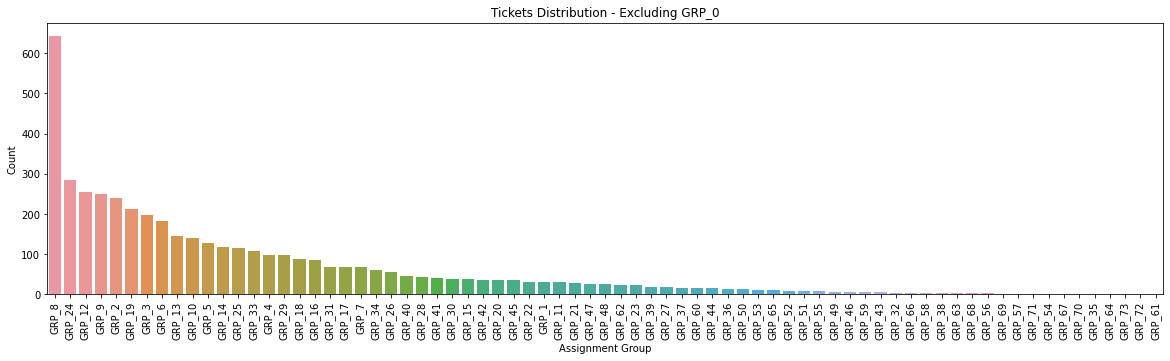

In [18]:
# Lets skip GRP_0 and visualize the count

temp_df1 = df[df['Assignment group'] != 'GRP_0']

plt.subplots(figsize = (20,5))

sns.countplot(x='Assignment group', data=temp_df1,order = temp_df1['Assignment group'].value_counts().index)
plt.xlabel('Assignment Group') 
plt.ylabel('Count') 
plt.xticks(rotation=90)
plt.title('Tickets Distribution - Excluding GRP_0')

plt.show()

In [19]:
temp_df2 = pd.DataFrame(df['Assignment group'].value_counts())
temp_df2
temp_df2 = temp_df2.T
temp_df2

,GRP_0,GRP_8,GRP_24,GRP_12,GRP_9,GRP_2,GRP_19,GRP_3,GRP_6,GRP_13,...,GRP_57,GRP_54,GRP_71,GRP_72,GRP_35,GRP_73,GRP_70,GRP_64,GRP_61,GRP_67
Assignment group,3426,644,285,255,251,241,213,198,182,145,...,2,2,2,1,1,1,1,1,1,1


In [20]:
df['Count'] = df.apply(lambda row: temp_df2[row['Assignment group']] , axis=1)

df.loc[df['Count'] <= 200 , "Assignment group"] = "GRP_X"

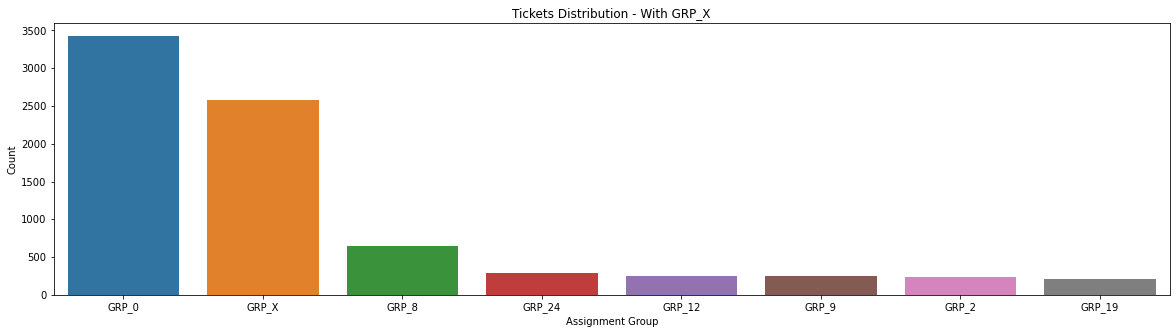

In [21]:
plt.subplots(figsize = (20,5))

sns.countplot(x='Assignment group', data=df,order = df['Assignment group'].value_counts().index)
plt.xlabel('Assignment Group') 
plt.ylabel('Count') 
plt.title('Tickets Distribution - With GRP_X')

plt.show()

In [22]:
df["Assignment group"].nunique()

8

In [23]:
df["Assignment group"].unique()

array(['GRP_0', 'GRP_X', 'GRP_8', 'GRP_9', 'GRP_12', 'GRP_19', 'GRP_2',
       'GRP_24'], dtype=object)